In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
l_eq= 1
m=1
g = 10
k=1
dt =.1
tmax= 10
Nt = int(tmax/dt)


z10=5
z20=8
v10=0
v20=0


def a(z1, z2):
    # mass order shouldnt change abs(f_spring)
    if z1<z2:
        f = k * (abs(z2 - z1) - l_eq)
    else:
        f = - k * (abs(z2 - z1) - l_eq)
        
    return f/m-g, -f/m-g

def El(z1,z2):
    dz = abs(z2-z1)
    x = dz-l_eq
    return k*x**2/2

def Ep(z1, z2):
    return m*g*(z1+z2)

def Ek(v1,v2):
    return m*(v1**2+v2**2)/2

def Et(z1,z2,v1,v2):
    return El(z1,z2)+Ep(z1,z2)+Ek(v1,v2)

In [43]:
def simulate(dt, l_eq= 1, m=1, g = 10, k=1, tmax= 10, z10=5, z20=6, v10=0, v20=0):
    Nt = int(tmax/dt)

    a10, a20 = a(z10, z20)

    z1 = np.zeros(Nt)
    z1[0]=z10
    z2 = np.zeros(Nt)
    z2[0] = z20
    v1 = np.zeros(Nt)
    v1[0] = v10
    v2 = np.zeros(Nt)
    v2[0] = v20

    a1=np.zeros(Nt)
    a1[0]=a10
    a2=np.zeros(Nt)
    a2[0]=a20

    for i in range(Nt-1):

        a1_old = a1[i]
        a2_old = a2[i]

        # update z
        z1[i+1] = z1[i]+ v1[i]*dt+a1_old/2*dt**2
        z2[i+1] = z2[i] + v2[i] * dt + a2_old / 2 * dt**2

        v1_half = v1[i] + 1/2*a1_old*dt
        v2_half = v2[i] + 1/2*a2_old*dt

        # reflect particles off ground
        if z1[i+1]<0:
            z1[i+1] = -z1[i+1]
            # z1[i + 1] =0
            v1_half = -v1_half
        if z2[i+1]<0:
            z2[i+1] = -z2[i+1]
            # z2[i + 1] = 0
            v2_half = -v2_half

        # update a
        a1_new, a2_new = a(z1[i+1], z2[i+1])
        a1[i+1] = a1_new
        a2[i+1] = a2_new

        # update v
        v1[i+1] = v1_half + a1_new*dt/2
        v2[i+1]=v2_half+a2_new*dt/2

    return z1, z2, v1, v2

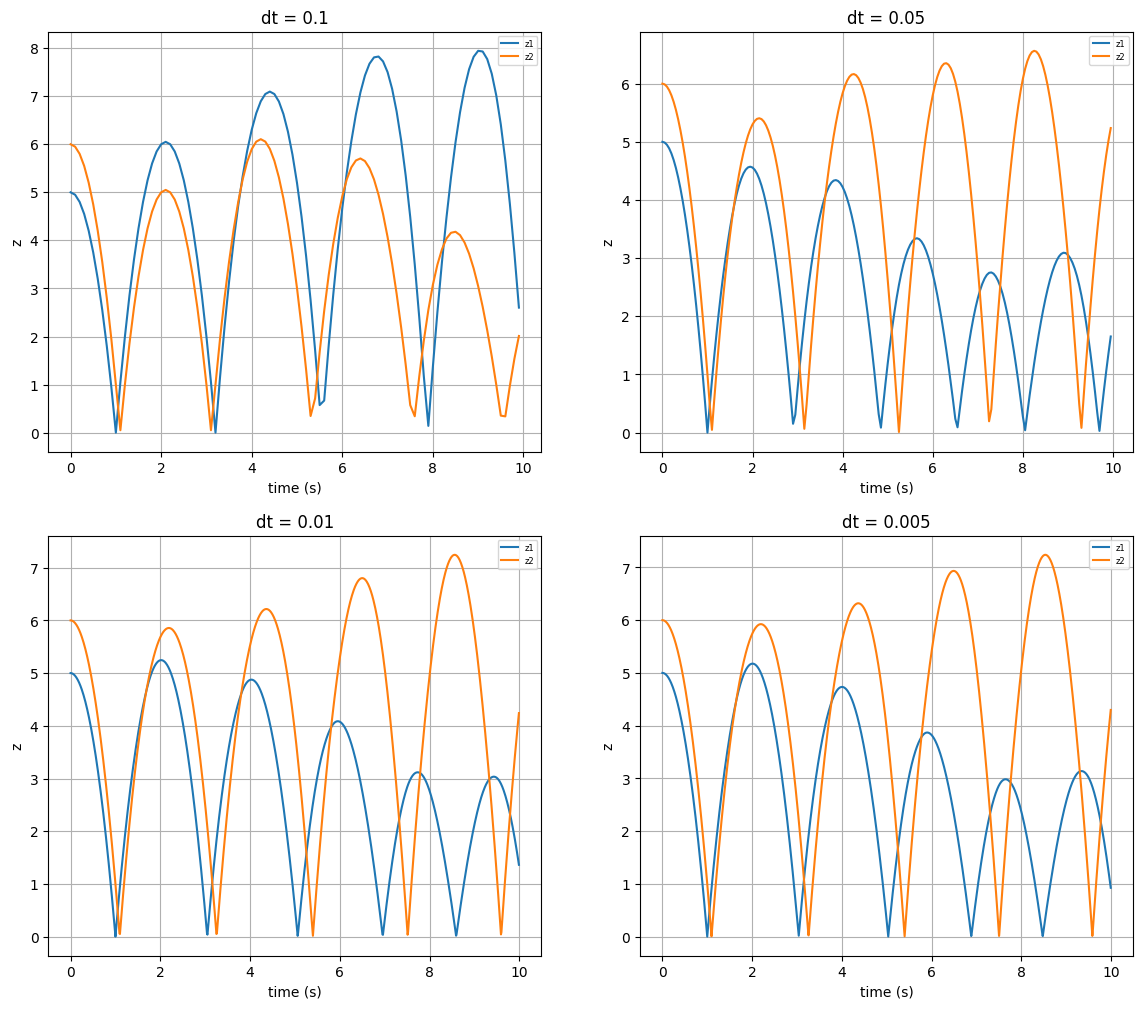

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

dt_list = [.1, .05, .01, .005]

for ax, dt in zip(axes.flatten(), dt_list):
    tmax = 10
    Nt = int(tmax/dt)
    Z1, Z2, V1, V2= simulate(dt, tmax=tmax)  # Use your Velocity Verlet simulator
    
    ts = np.array([i*dt for i in range(Nt)])
    
    ax.plot(ts, Z1, label="z1")
    ax.plot(ts, Z2, label="z2")
    ax.set_title(f"dt = {dt}")
    ax.set_ylabel("z")
    ax.set_xlabel("time (s)")
    ax.legend(fontsize=6)
    ax.grid()

plt.show();

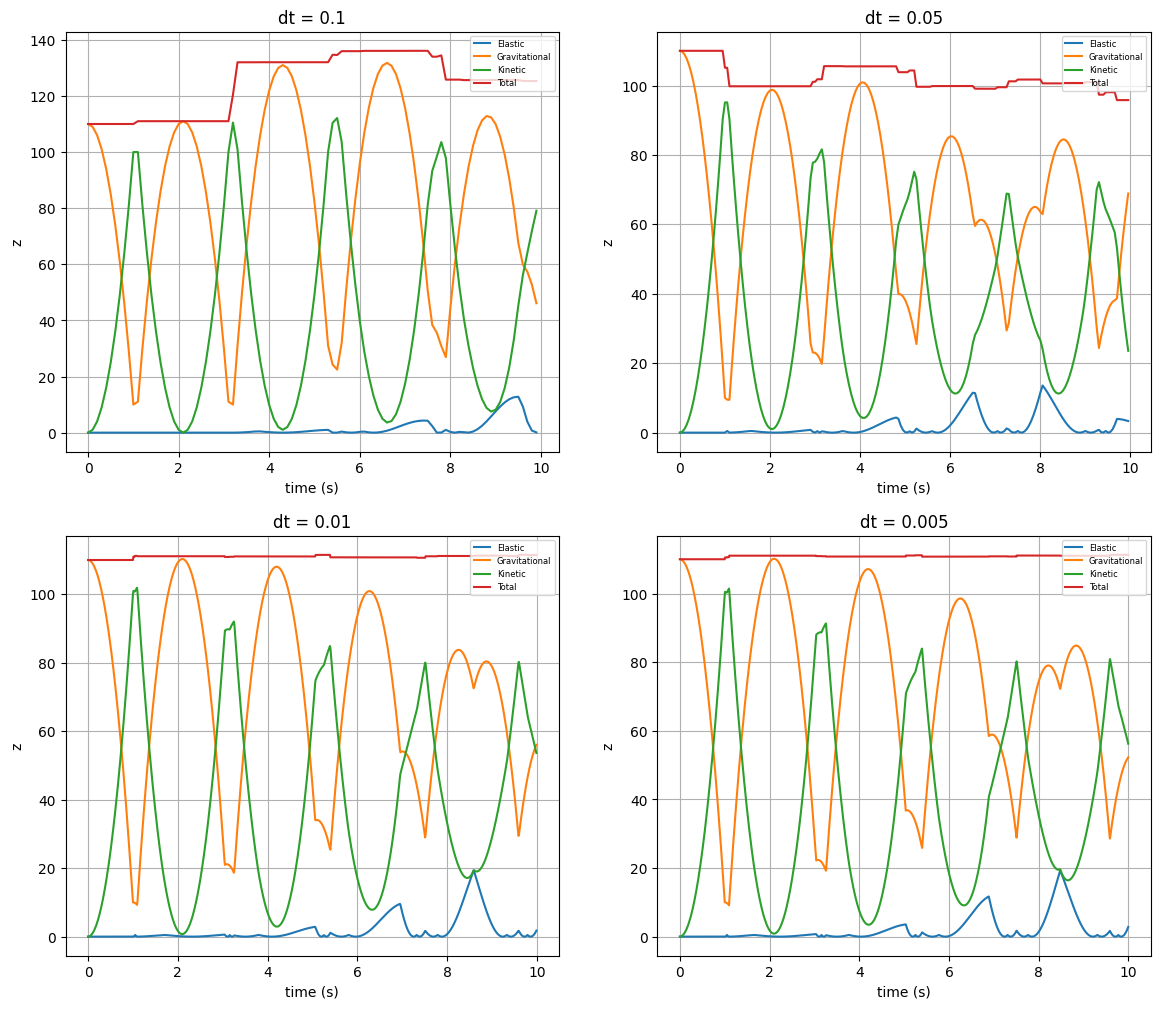

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

dt_list = [0.1, 0.05, 0.01, 0.005]

for ax, dt in zip(axes.flatten(), dt_list):
    tmax = 10
    Nt = int(tmax / dt)
    Z1, Z2, V1, V2 = simulate(dt, tmax=tmax)  # Use your Velocity Verlet simulator

    ts = np.array([i * dt for i in range(Nt)])

    ax.plot(ts, El(Z1,Z2), label="Elastic")
    ax.plot(ts, Ep(Z1,Z2), label="Gravitational")
    ax.plot(ts, Ek(V1,V2), label="Kinetic")
    ax.plot(ts, Et(Z1,Z2, V1, V2), label="Total")
    ax.set_title(f"dt = {dt}")
    ax.set_ylabel("z")
    ax.set_xlabel("time (s)")
    ax.legend(fontsize=6, loc="upper right")
    ax.grid()

plt.show()

In [62]:
tmax = 10
dt=0.0001
m=1
k=1
l_eq = 1
g=10
Nt = int(tmax/dt)
ts = np.array([i*dt for i in range(Nt+1)])
N = 10 # number of masses
N_springs = N-1
z0 = np.array([4+(i+1) for i in range(N)])
v0 = np.zeros(N)


def spring_a(z1, z2):

    # mass order shouldnt change abs(f_spring)
    if z1 <= z2:
        f = k * (abs(z2 - z1) - l_eq)
    else:
        f = -k * (abs(z2 - z1) - l_eq)

    return f / m, -f / m 

def update_spring(Z, i):
    azi, azip1 = spring_a(Z[i], Z[i+1])
    return azi, azip1


def accel(Z):
    a = np.zeros_like(Z)
    # iterate over springs from top to bottom to add each springs accel.
    for i in range(N_springs-1,0,-1):
        ai, aip1 = update_spring(Z,i)   
        a[i] +=ai
        a[i+1] +=ai
    # add gravity here to only add it once
    a -= g
    return a 

# ===== Sim start ========

zs_t=[z0]
vs_t=[v0]


for t in range(Nt):
    
    # init vars to append
    zt = np.copy(zs_t[-1])
    vt = np.copy(vs_t[-1])
    # calc
    a_old = accel(zt)

    zt_new = zt + vt*dt + a_old/2 *dt**2

    vt_half = vt + a_old*dt/2

    # bounce off ground
    for i,z in enumerate(zt_new):
        if z<=0:
            zt_new[i] = -zt_new[i]
            # zt_new[i] = 0 
            vt_half[i] = -vt_half[i]

    a_new = accel(zt_new)

    vt_new = vt_half + a_new*dt/2

    # appending calculated vars
    zs_t.append(zt_new)
    vs_t.append(vt_new)

zs_t = np.array(zs_t)

In [63]:
# energies for mass chain

def total_Ep(Z, m=m, g=g):
    Ep = []
    for t, zt in enumerate(Z):
        Ept = 0
        for i, zti in enumerate(zt):
            Ept+=m*g*float(zti)
        Ep.append(Ept)
    return np.array(Ep)


def total_Ek(V, m=m, g=g):
    Ek = []
    for t, vt in enumerate(V):
        Ekt = 0
        for i, vti in enumerate(vt):
            Ekt += m /2 * float(vti)**2
        Ek.append(Ekt)
    return np.array(Ek)


def total_El(Z, m=m, g=g):
    Ns = int(np.shape(Z[0, :])[0]) - 1
    Els = []

    for t, zt in enumerate(Z):
        Eli=0
        for i in range(Ns - 1, 0, -1):
            Eli += El(zt[i], zt[i+1])
        Els.append(Eli)
        
    return np.array(Els)

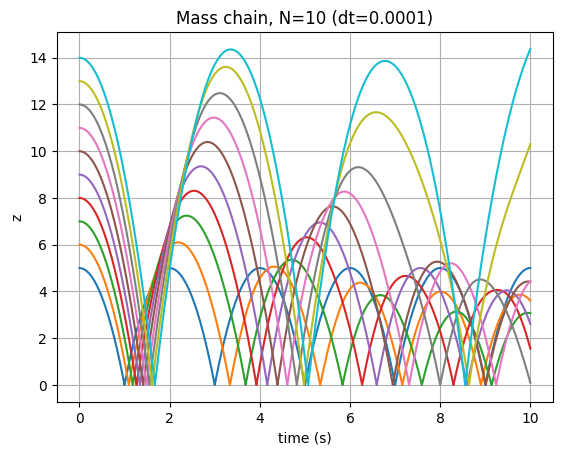

In [64]:
for i in range(N):
    plt.plot(ts, zs_t[:, i], label=f"mass:{i+1}")
# plt.legend(loc="upper right")
plt.title(f"Mass chain, N=10 (dt={dt})")
plt.xlabel("time (s)")
plt.grid()
plt.ylabel("z");

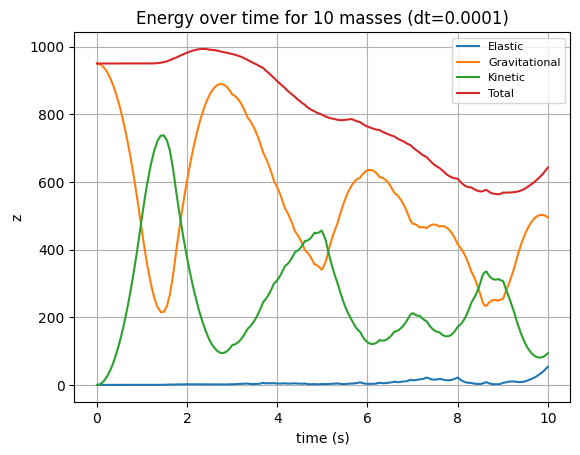

In [65]:
elastic = total_El(zs_t)
potential = total_Ep(zs_t)
kinetic = total_Ek(vs_t)
total=elastic+potential+kinetic
plt.plot(ts, elastic, label="Elastic")
plt.plot(ts, potential, label="Gravitational")
plt.plot(ts, kinetic, label="Kinetic")
plt.plot(ts, total, label="Total")
plt.title(f"Energy over time for {N} masses (dt={dt})")
plt.ylabel("z")
plt.xlabel("time (s)")
plt.legend(fontsize=8)
plt.grid()

plt.show()